In [3]:
##importing packages
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()

import numpy as np

In [161]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [235]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [163]:
train2 = train.drop('Item_ID', axis=1)
test2 = test.drop('Item_ID', axis=1)

In [164]:
train2.head()

,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [165]:
def handle_non_numerical_data(df):
    columns = test2.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if test2[column].dtype != np.int64 and test2[column].dtype != np.float64:
            column_contents = test2[column].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            test2[column] = list(map(convert_to_int, test2[column]))
    return test2

data_test = handle_non_numerical_data(test2)
data_test.head()

,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,2,311,8.270,0,0.214125,0,459.98,2005,0,1,1
1,6,2956,8.270,0,0.127821,0,464.98,1994,2,1,2
2,6,3137,7.390,1,0.082171,0,477.38,1994,2,1,2
3,2,1535,6.115,0,0.011791,0,472.63,2005,0,1,1
4,6,2729,6.115,0,0.007038,0,473.13,1994,2,1,2


In [166]:
def handle_non_numerical_data(df):
    columns = train2.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if train2[column].dtype != np.int64 and train2[column].dtype != np.float64:
            column_contents = train2[column].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            train2[column] = list(map(convert_to_int, train2[column]))
    return train2

data_train = handle_non_numerical_data(train2)
data_train.head()

,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,2,201,11.6,0,0.068535,0,357.54,2005,0,1,1,709.08
1,6,3252,11.6,0,0.040912,0,355.79,1994,2,1,2,6381.69
2,5,4646,11.6,0,0.041178,0,350.79,2014,0,2,2,6381.69
3,8,2200,11.6,0,0.041113,0,355.04,2016,1,1,0,2127.23
4,9,1705,11.6,2,0.000000,0,354.79,2011,3,2,2,2481.77


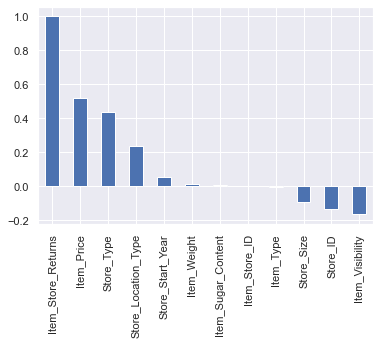

In [167]:
data_train.corr()['Item_Store_Returns'].sort_values(ascending=False).plot(kind='bar')

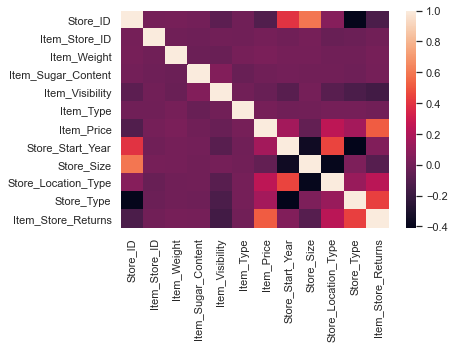

In [168]:
sns.heatmap(data=data_train.corr())

# filling missing data

In [169]:
data_train['Item_Weight'] = data_train['Item_Weight'].fillna(data_train['Item_Weight'].mean())
data_test['Item_Weight'] = data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean())



In [170]:
data_test.isnull().sum()

Store_ID               0
Item_Store_ID          0
Item_Weight            0
Item_Sugar_Content     0
Item_Visibility        0
Item_Type              0
Item_Price             0
Store_Start_Year       0
Store_Size             0
Store_Location_Type    0
Store_Type             0
dtype: int64

In [204]:
#dropping date

#data_train = data_train.drop(['Store_Start_Year', 'Item_Sugar_Content', 'Item_Store_ID', 'Item_Type'])
data_train.head(1)

,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,2,201,11.6,0,0.068535,0,357.54,2005,0,1,1,709.08


In [236]:
column = ['Item_Price', 'Store_Type', 'Store_Location_Type','Item_Weight' ]
x = data_train[column]
y = data_train.Item_Store_Returns
x

,Item_Price,Store_Type,Store_Location_Type,Item_Weight
0,357.54,1,1,11.600000
1,355.79,2,1,11.600000
2,350.79,2,2,11.600000
3,355.04,0,1,11.600000
4,354.79,2,2,11.600000
...,...,...,...,...
4985,402.39,1,0,12.908838
4986,410.14,3,1,12.908838
4987,406.14,2,2,14.650000
4988,404.89,2,0,14.650000


In [237]:
from sklearn.model_selection import train_test_split


In [238]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=101)

In [239]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression

from sklearn.metrics import roc_curve, roc_auc_score, log_loss


In [240]:
x_train.head()

,Item_Price,Store_Type,Store_Location_Type,Item_Weight
3264,370.51,1,1,5.635000
2958,470.72,2,0,19.750000
3290,489.61,3,1,12.908838
4934,437.26,1,1,7.285000
323,322.41,0,1,6.865000


# linear regression

In [241]:
linear = LinearRegression()

linear.fit(x_train, y_train)

LinearRegression()

In [242]:
linear.score(x_test, y_test)

0.36612440254082745

In [234]:
# using root mean square
y_pred = linear.predict(x_test)
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2802.489610770114
Mean Squared Error: 12888087.769697564
Root Mean Squared Error: 3589.9982966148555


# prediction

In [126]:
sample = pd.read_csv('SampleSubmission.csv')
sample.tail()

,Item_Store_ID,Item_Store_Returns
3527,NCZ42_BABATUNJI010,100
3528,NCZ42_BABATUNJI013,100
3529,NCZ42_BABATUNJI049,100
3530,NCZ53_BABATUNJI010,100
3531,NCZ53_BABATUNJI013,100


In [225]:
predictions = linear.predict(data_test[column])

submission_df = {'Item_Store_ID': test['Item_Store_ID'],
                'Item_Store_Returns': predictions}

submission_df = pd.DataFrame(submission_df)
submission_df.head()


,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,4715.298132
1,DRA59_BABATUNJI013,7890.745088
2,DRB01_BABATUNJI013,8382.297436
3,DRB13_BABATUNJI010,6123.454807
4,DRB13_BABATUNJI013,8748.796632


In [226]:
submission_df.to_csv('submission21.csv', index=False)
pd.read_csv('submission21.csv')

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,4715.298132
1,DRA59_BABATUNJI013,7890.745088
2,DRB01_BABATUNJI013,8382.297436
3,DRB13_BABATUNJI010,6123.454807
4,DRB13_BABATUNJI013,8748.796632
...,...,...
3527,NCZ42_BABATUNJI010,8361.113591
3528,NCZ42_BABATUNJI013,10827.053913
3529,NCZ42_BABATUNJI049,10788.785130
3530,NCZ53_BABATUNJI010,5913.517432


In [247]:
(110/140)

0.7857142857142857